## **Car Data Analysis Project**

---

### **1 Introduction**
##### In this project, I analyze a dataset of 11914 car listings and 16 features.
#####The goal is to clean the data, engineer new features, perform exploratory data analysis (EDA), and create visualizations to uncover meaningful insights.

###**2 Importing Libraries and Loading the Dataset**

In this section, I import all the required libraries and load the dataset into a pandas DataFrame.  
I will also preview the first few rows to get an initial sense of the data structure.

In [ ]:
# Importing the core libraries

import numpy as np  # Numerical operations and array handling
import pandas as pd # Data manipulation and cleaning

import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns # Statistical visualizations

import scipy.stats as stats # Correlation and statistical tests

In [ ]:
# Reading the csv file
from google.colab import drive
drive.mount('/content/drive')

df =pd.read_csv('/content/drive/MyDrive/Masterschool/CarDataAnalysisProject/data.csv')

# Checking the first five rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


###**3 Initial Exploration**

Here, I examine the structure of the dataset.
I check the data types of each column and look for potential issues, such as missing values, inconsistent formats, or duplicated rows.

In [ ]:
# Checking the shape of the DataFrame
df.shape

(11914, 16)

**Note**: The dataset contains 11914 rows and 16 columns.

In [ ]:
# Checking the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Checking basic statistics (mean, std, min, max) to better understand the scale of each variable.
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Checking missing values in each column.
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


**Note**: Few columns contain missing values, Engine Fuel Type, Engine HP, Engine Cylinders, and Number of Doors, while **Market Category** has more than 30% missing entries, which will require special handling.

In [ ]:
# Checking for duplicate rows before proceeding with cleaning
df.duplicated().sum()

np.int64(715)

**Note**: I found **715 duplicate rows** in the dataset.
Because duplicates can distort summary statistics, correlations, and visualizations, I will remove them in the data cleaning step to ensure the accuracy of the analysis.

In [ ]:
# Checking the number of unique values per column.
df.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


###### Checking suspicious values in categorical columns (the EDA revealed some 'unknown' entries in the Transmission Type column)

In [ ]:
# Creating a function to check categorical columns for suspicious values such as 'unknown', 'other', 'others'
def check_unknowns(dataf, suspicious_values=None):

    # Checking categorical columns for suspicious values such as 'unknown', 'other', 'others'.
    if suspicious_values is None:
        suspicious_values = ['unknown', 'other', 'others'] # List of suspicious values
    else:
      suspicious_values = suspicious_values.str.lower() # Transforming the passed list of values to lowercase values

    #Including only category columns
    cat_cols = dataf.select_dtypes(include=['object','category']).columns

    results = {}
    # Each column in the category columns dataframe is compared with the suspicious values
    for col in cat_cols:
        values_lower = dataf[col].str.lower().unique() # Comparing only in lowercase and only one time (so I used unique)
        # If a suspicious_values is found, fill the results dictionary with name of column as key and found as value
        found = [val for val in values_lower if val in suspicious_values]
        if found:
            results[col] = found

    return results

In [ ]:
# Checking unknown values with the function check_unknowns()
check_unknowns(df)

{'Transmission Type': ['unknown']}

In [ ]:
# Counting how many values Transmission Type has
df[df['Transmission Type'].str.lower() == 'unknown'].value_counts(df['Transmission Type'])

,count
Transmission Type,
UNKNOWN,19


####**3.1 Summary of Initial Exploration**

The initial exploration revealed that the dataset is generally well-structured with the right data types for each columns, but some issues need attention:
- Several columns have missing values, in particular Market Category.

- 715 duplicate rows were detected and will be removed.

- Most numerical columns are well-behaved, but some like Engine HP and MSRP show wide ranges **(to check)**

- The column 'Transmission Type' has 'unknown' values **(to check)**

- The unique values check confirmed high cardinality in Model and low cardinality in categorical features like Vehicle Size.

These findings will guide the data cleaning and feature engineering steps in the next section.


###**4 Data Cleaning**

I clean the dataset by addressing missing values, removing duplicates, correcting data types, and applying all filtering and standardization steps required for the analysis.

####**4.1 Removing Duplicate Rows**

I remove duplicates and I reset the index to keep a clean and continuous row numbering.
This ensures consistency for all the next data-cleaning and analysis steps.

In [ ]:
# Removing 715 duplicated rows and resetting the index removing the old one
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

####**4.2 Handling Missing Data**

Here, I examine all columns containing missing values and decide how to address them.
For each variable, I justify the selected approach depending on whether the column is numerical, categorical, essential for later tasks.

The goal is to retain meaningful information without introducing bias.

Since duplicates were removed in the previous step, I recalculate the number of missing values to ensure the counts reflect the cleaned dataset.

In [ ]:
# Total missing values for each column
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3376


Updated Missing Values:
- Engine HP: 69
- Engine Cylinders: 30
- Number of Doors: 6
- Engine Fuel Type: 3
- Market Category: 3376

In [ ]:
###### Engine HP ######

# Checking the distribution of Engine HP to decide how to impute the missing values
# I examine the mean, median, and mode to identify the most appropriate replacement.
print("Engine HP")
print(df['Engine HP'].describe())
print(f"Mode: {df['Engine HP'].mode()[0]}")

Engine HP
count    11130.000000
mean       253.388859
std        110.150938
min         55.000000
25%        172.000000
50%        239.000000
75%        303.000000
max       1001.000000
Name: Engine HP, dtype: float64
Mode: 200.0


**Note**: From the summary statistics, the mean (253.39) is slightly higher than the median (239.00), suggesting a right-skewed distribution influenced by some high values. Because of this skewness, the median is a more reliable choice for imputing the missing Engine HP values.

In [ ]:
# Replace missing Engine HP values with the median.
# Using assignment instead of inplace avoids FutureWarnings in pandas.
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
print(df['Engine HP'].describe())
print(f"Mode: {df['Engine HP'].mode()[0]}")

count    11199.000000
mean       253.300205
std        109.816822
min         55.000000
25%        172.000000
50%        239.000000
75%        303.000000
max       1001.000000
Name: Engine HP, dtype: float64
Mode: 200.0


**Note**: After imputing missing Engine HP values using the median, the overall distribution remains consistent and unchanged.

In [ ]:
###### Engine Cylinders ######

# Checking the distribution of Engine Cylinders to decide how to impute the missing values
# I examine the mean, median, and mode to identify the most appropriate replacement.
print("Engine Cylinders")
print(df['Engine Cylinders'].describe())
print(f"Mode: {df['Engine Cylinders'].mode()[0]}")

Engine Cylinders
count    11169.000000
mean         5.665950
std          1.797021
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64
Mode: 4.0


**Note**: The distribution shows a mean of 5.67 cylinders, a median of 6, and a mode of 4. This suggests a typical mix of 4 cylinder and 6 cylinder engines. The minimum value is 0 cylinders for the electric cars.

The maximum value is 16 cylinders, which is unusual but still possible for specific high-performance vehicles.

In [ ]:
# Checking if some electric cars have Engine Cylinders with null values
(df['Engine Cylinders'].isnull() & (df['Engine Fuel Type'] == 'electric')).sum()

np.int64(10)

**Note**: Among the missing Engine Cylinders values (30), 10 belong to electric vehicles. Since electric motors do not have cylinders, these missing values are replaced with 0.
The remaining missing values (20) for non-electric vehicles are imputed using the median (6) to reflect typical engine configurations.

In [ ]:
# Replacing the null in Engine Cylinders for electric cars with 0
df.loc[df['Engine Cylinders'].isnull() & (df['Engine Fuel Type'] == 'electric'), 'Engine Cylinders'] = 0

# Computing median for non-electric vehicles only
median_cyl = df.loc[df['Engine Fuel Type'] != 'electric', 'Engine Cylinders'].median()
# Filling missing values with the computed median
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(median_cyl)

print(df['Engine Cylinders'].describe())
print(f"Mode: {df['Engine Cylinders'].mode()[0]}")

count    11199.000000
mean         5.661488
std          1.802632
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64
Mode: 4.0


**Note**: After imputing missing Engine Cylinders, the distribution remains unchanged and all values are now filled.

In [ ]:
###### Number of Doors ######

# Checking the distribution of Number of Doors to decide how to impute the 6 missing values
print("Number of Doors")
print(df['Number of Doors'].describe())
print(f"Mode: {df['Number of Doors'].mode()[0]}")

Number of Doors
count    11193.000000
mean         3.454123
std          0.872946
min          2.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Number of Doors, dtype: float64
Mode: 4.0


In [ ]:
# Taking a look at the null values of Number of Doors
df[df['Number of Doors'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4431,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6563,Tesla,Model S,2016,electric,239.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6564,Tesla,Model S,2016,electric,239.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6565,Tesla,Model S,2016,electric,239.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6566,Tesla,Model S,2016,electric,239.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6567,Tesla,Model S,2016,electric,239.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [ ]:
# Computing the Average of the columns Number of Doors for each make
print("Average Number of Doors Tesla:",df[df['Make'] == 'Tesla']['Number of Doors'].mean())
print("Average Number of Doors Ferrari:",df[df['Make'] == 'Ferrari']['Number of Doors'].mean())

Average Number of Doors Tesla: 4.0
Average Number of Doors Ferrari: 2.0


In [ ]:
# Filling missing values with the mode 4 for every Nan in Number of Doors in Tesla and 2 for Ferrari
df.loc[(df['Make'] == 'Ferrari') & (df['Number of Doors'].isna()), 'Number of Doors'] = 2
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])
print(df['Number of Doors'].describe())
print(f"Mode: {df['Number of Doors'].mode()[0]}")


count    11199.000000
mean         3.454237
std          0.872896
min          2.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Number of Doors, dtype: float64
Mode: 4.0


**Note**: The missing Number of Doors values appear in one Ferrari (2 doors) and five Teslas (4 doors). I replaced them with the mode (4), which represents most vehicles and has little impact on the dataset.

In [ ]:
###### Engine Fuel Type ######
# Checking the distribution of Engine Fuel Type to decide how to impute the missing values
print("Engine Fuel Type")
print(df['Engine Fuel Type'].describe())
print(f"Mode: {df['Engine Fuel Type'].mode()[0]}")

Engine Fuel Type
count                11196
unique                  10
top       regular unleaded
freq                  6658
Name: Engine Fuel Type, dtype: object
Mode: regular unleaded


In [ ]:
df['Engine Fuel Type'].value_counts()

,count
Engine Fuel Type,
regular unleaded,6658
premium unleaded (required),1956
premium unleaded (recommended),1392
flex-fuel (unleaded/E85),887
diesel,150
electric,66
flex-fuel (premium unleaded required/E85),53
flex-fuel (premium unleaded recommended/E85),26
flex-fuel (unleaded/natural gas),6


In [ ]:
# Filtering only the 3 rows with the missing values
df[df['Engine Fuel Type'].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10620,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
10621,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
10622,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [ ]:
# Exploring the vehicles of Suzuki with Model 'Verona' to see which Engine fuel type they normally have
df[(df['Make'] == 'Suzuki') & (df['Model'] == 'Verona')]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10620,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
10621,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
10622,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
10623,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
10624,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
10625,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
10626,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
10627,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
10628,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


In [ ]:
# Filling the null values with 'regular unleaded' because is the category that appears in this model of cars
# It is also the most frequent value
df['Engine Fuel Type']= df['Engine Fuel Type'].fillna('regular unleaded')
print(df['Engine Fuel Type'].describe())
print(f"Mode: {df['Engine Fuel Type'].mode()[0]}")

count                11199
unique                  10
top       regular unleaded
freq                  6661
Name: Engine Fuel Type, dtype: object
Mode: regular unleaded


**Note**: All missing values in Engine Fuel Type correspond to the Suzuki Verona (2004).

Since all other Verona models (2005-2006) use regular unleaded and share the same engine specifications, this strongly suggests that the 2004 model used the same fuel type. By the way the 'regular unleaded' is also the most frequent value.

For this reason, I filled the missing values with 'regular unleaded', which is the most accurate and consistent choice.

In [ ]:
###### Market Category ######

# Checking the distribution of Market Category to decide if and how to impute the missing values
print("Market Category")
print(df['Market Category'].describe())
print(f"Mode: {df['Market Category'].mode()[0]}")

Market Category
count          7823
unique           71
top       Crossover
freq           1075
Name: Market Category, dtype: object
Mode: Crossover


In [ ]:
# Checking the number of rows grouped per Market Category
df['Market Category'].value_counts()

,count
Market Category,
Crossover,1075
Flex Fuel,855
Luxury,819
"Luxury,Performance",659
Hatchback,574
...,...
"Crossover,Exotic,Luxury,High-Performance",1
"Crossover,Exotic,Luxury,Performance",1
"Performance,Hybrid",1


In [ ]:
# list of same cars with different market category and price but with the same other columns to investigate a schema for market category
feature_columns = [column for column in df.columns if column not in ['MSRP', 'Market Category']]
result = (df.groupby(feature_columns)
      .filter(lambda df_market_category: df_market_category['Market Category'].nunique() > 1).sort_values(feature_columns)
)
result.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
9835,Acura,TL,2012,premium unleaded (required),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,41635
9838,Acura,TL,2012,premium unleaded (required),280.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,29,20,204,35705
9840,Acura,TL,2012,premium unleaded (required),280.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,29,20,204,39435
9841,Acura,TL,2013,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,39635
9845,Acura,TL,2013,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,41835
9847,Acura,TL,2013,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,29,20,204,35905
9848,Acura,TL,2013,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,37405
9849,Acura,TL,2014,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,37530
9850,Acura,TL,2014,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,29,20,204,36030
9853,Acura,TL,2014,premium unleaded (recommended),280.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,20,204,39760


**Note**: Market Category contains over 30% missing values and 71 distinct classes. Several strategies were considered:

- Imputation based on similar cars: discarded because even vehicles with identical specifications (make, model, year, cylinders, drivetrain, fuel type, etc.) frequently fall into different Market Categories. This indicates that the feature is not predictable from the others.

- Dropping the column: possible, but its usefulness depends on the final predictive model. Removing it now could lead to information loss that might matter later.

- One-hot encoding the categories: possible since each entry is a comma-separated combination of tags (e.g., “Crossover, Luxury, Flex Fuel”), which could be split into individual binary features. However, despite reducing redundancy, this still introduces high dimensionality and potentially noisy features given the large number of unique tags and missing values.

I think the most neutral and least biased choice is to retain the column and replace missing values with **'unknown'**. This preserves the information structure without assumptions that could mislead further analysis.

In [ ]:
# Filling with 'unknown'
df['Market Category'] = df['Market Category'].fillna('unknown')

####4.3 **Transmission Type: Unknown values**

In [ ]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [ ]:
df[df['Transmission Type'] == 'UNKNOWN']

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1252,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,2.0,unknown,Midsize,Coupe,29,19,26,2000
1253,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,4.0,unknown,Midsize,Sedan,29,19,26,2000
4456,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,"Hatchback,Performance",Midsize,2dr Hatchback,23,15,210,6175
4457,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,"Hatchback,Factory Tuner,Performance",Midsize,2dr Hatchback,23,15,210,8548
4458,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,"Factory Tuner,Performance",Midsize,Convertible,23,15,210,9567
5812,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,unknown,Compact,2dr SUV,19,14,549,2182
5814,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,unknown,Compact,2dr SUV,19,14,549,2317
5819,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,unknown,Compact,2dr SUV,20,15,549,2407
5828,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,unknown,Compact,2dr SUV,18,14,549,2578
6016,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,UNKNOWN,front wheel drive,2.0,unknown,Compact,Coupe,26,21,1013,2000


In [ ]:
df['Transmission Type'].value_counts()

,count
Transmission Type,
AUTOMATIC,7932
MANUAL,2634
AUTOMATED_MANUAL,553
DIRECT_DRIVE,68
UNKNOWN,12


In [ ]:
# I delete the rows because these don't impact on the dataset statistic, they are standard old veihcles
#(3 will be deleted anyway by filtering the dataframe from the year 1995 and later)
df = df[df['Transmission Type'] != 'UNKNOWN']

####**4.4 Outliers**

During the EDA phase, one Audi A6 record showed an impossible highway MPG value (354).
This anomaly indicated a data-entry error that was not visible during the initial cleaning.

I therefore returned to the cleaning step, verified the raw values, and corrected the highway MPG to 34, which is consistent with all identical models.
This iterative correction ensures the dataset remains reliable for the subsequent analysis.

In [ ]:
# Investigating on the strange value for Total MPG > 175 appeared in EDA Visualization phase and the highway MPG is over 350
df[df['highway MPG']> 300]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1083,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [ ]:
# Visualizing only the vehicle with the same characteristic

df[(df['Make'] == 'Audi') & (df['Model'] == 'A6') & (df['Engine Fuel Type'] == 'premium unleaded (recommended)') & (df['Year'] == 2017)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1078,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,31,22,3105,53800
1082,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,32,22,3105,49800
1083,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
1084,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,34,24,3105,47600


So the spike in the scatterplot is not a special car — it's a **data entry mistake**. I fill the highway MPG with 34.

In [ ]:
# Imputing 34 to highway MPG only for this vehicle
df.loc[df['highway MPG']>350,'highway MPG'] = 34
df[
    (df['Make'] == 'Audi') &
    (df['Model'] == 'A6') &
    (df['Engine Fuel Type'] == 'premium unleaded (recommended)') &
    (df['Year'] == 2017) &
    (df['Transmission Type'] == 'AUTOMATED_MANUAL')
  ]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1083,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,34,24,3105,51600
1084,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,34,24,3105,47600


####**4.5 Filtering the Dataset**

Here, I apply the required filter to include only vehicles from the year 1995 and later.
This step ensures alignment with the project requirements and removes outdated records that may not be relevant to the final analysis.

In [ ]:
# Filtering the dataframe to include only vehicles from the year 1995 and later
df = df[df['Year'] >= 1995]
# Resetting the index
df = df.reset_index(drop = True)
# Displaying the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10594 non-null  object 
 1   Model              10594 non-null  object 
 2   Year               10594 non-null  int64  
 3   Engine Fuel Type   10594 non-null  object 
 4   Engine HP          10594 non-null  float64
 5   Engine Cylinders   10594 non-null  float64
 6   Transmission Type  10594 non-null  object 
 7   Driven_Wheels      10594 non-null  object 
 8   Number of Doors    10594 non-null  float64
 9   Market Category    10594 non-null  object 
 10  Vehicle Size       10594 non-null  object 
 11  Vehicle Style      10594 non-null  object 
 12  highway MPG        10594 non-null  int64  
 13  city mpg           10594 non-null  int64  
 14  Popularity         10594 non-null  int64  
 15  MSRP               10594 non-null  int64  
dtypes: float64(3), int64(5

**Note**: **To better explain after deciding how handle market category!** If we keep the null values of market category, removing old cars, remove also 300 records with market category null. Only to notice.

####**4.6 Standardizing Text Columns**

In this step, I convert key textual columns, **Vehicle Style** and **Market Category**, to lowercase to avoid inconsistencies that might affect grouping operations or visualizations later in the analysis.

In [ ]:
# Converting Vehicle Style entries to lowercase
df['Vehicle Style'] = df['Vehicle Style'].str.lower()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,convertible,28,18,3916,34500


In [ ]:
# Converting Market Category entries to lowercase
df['Market Category'] = df['Market Category'].str.lower()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500


###**5 Feature Engineering**


####**5.1 Creating Total MPG**

I create a new column, Total MPG, representing the average of city mpg and highway MPG.
This helps summarize fuel efficiency into a single, 'easy to interpret' metric.

In [ ]:
# Creating Total MPG column
df['Total MPG'] = (df['city mpg'] + df['highway MPG'])/2
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500,23.0


####**5.2 Creating Price per HP**

I generate a new metric, Price per HP, defined as MSRP/Engine HP.
This feature helps analyze the cost efficiency of a car relative to its horsepower.

In [ ]:
# Creating Price per HP
df['Price per HP'] = round(df['MSRP']/df['Engine HP'],2)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5,137.72
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5,135.50
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0,121.17
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0,128.04
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,luxury,Compact,convertible,28,18,3916,34500,23.0,150.00


###**6 Exploratory Data Analysis (EDA)**

####**6.1 Descriptive Statistics**

In this section, I compute summary statistics such as mean, median, and standard deviation for key numerical variables.
This provides an overview of the dataset's central tendencies, variability, and general distribution.

In [ ]:
# Computing descriptive statistics
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
count,10594.000000,10594.000000,10594.000000,10594.000000,10594.000000,10594.000000,10594.000000,1.059400e+04,10594.000000,10594.000000
mean,2011.762035,259.032660,5.682462,3.483481,26.719653,19.835473,1576.393997,4.419296e+04,23.277563,150.919840
std,5.897365,109.301744,1.814430,0.857308,8.551306,9.374037,1459.212752,6.251069e+04,8.835544,98.649325
min,1995.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03,9.500000,7.140000
25%,2008.000000,180.000000,4.000000,3.000000,22.000000,16.000000,549.000000,2.315125e+04,19.000000,116.472500
50%,2015.000000,240.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,3.164000e+04,22.000000,137.500000
75%,2016.000000,305.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.400750e+04,26.000000,165.510000
max,2017.000000,1001.000000,16.000000,4.000000,111.000000,137.000000,5657.000000,2.065902e+06,124.000000,2307.690000


In [ ]:
#Computing descriptive statistics for Engine HP, MSRP, Popularity, highway MPG, and city mpg.
df[['Engine HP','MSRP','Popularity', 'highway MPG','city mpg']].describe()

,Engine HP,MSRP,Popularity,highway MPG,city mpg
count,10594.000000,1.059400e+04,10594.000000,10594.000000,10594.000000
mean,259.032660,4.419296e+04,1576.393997,26.719653,19.835473
std,109.301744,6.251069e+04,1459.212752,8.551306,9.374037
min,55.000000,2.000000e+03,2.000000,12.000000,7.000000
25%,180.000000,2.315125e+04,549.000000,22.000000,16.000000
50%,240.000000,3.164000e+04,1385.000000,26.000000,18.000000
75%,305.000000,4.400750e+04,2009.000000,30.000000,22.000000
max,1001.000000,2.065902e+06,5657.000000,111.000000,137.000000


######**6.1.1 Descriptive Statistics: Key Insights**

- **Engine HP**
Ranges from 55 to 1001 HP, indicating the presence of both low-power economy cars and extremely high-performance vehicles. The large standard deviation and the gap between mean (259) and median (240) confirm a right-skewed distribution driven by high-horsepower models.

- **MSRP**
Prices span from 2,000 to over 2M, showing a wide mix of budget cars, mainstream vehicles, and luxury/exotic models. The median (31k) is far below the maximum, reflecting a strongly skewed distribution due to a small number of very high-priced vehicles.

- **Popularity**
Popularity values vary from 2 to 5657. With a mean of 1576 and a median of 1385, the distribution is moderately right-skewed, suggesting that a few highly popular models pull the average upward.

- **Highway MPG**
Values mostly range between 22 and 30 mpg, but the maximum of 111 mpg indicates the presence of highly efficient or electric vehicles. The distribution is right-skewed due to these outliers.

- **City MPG**
Typical values fall between 16 and 22 mpg, but the maximum reaches 137 mpg, again reflecting electric vehicles. The high standard deviation and long right tail show big variability.

####**6.2 Group Analysis**

I analyze the average MSRP and Popularity across several categories, including:

- Driven_Wheels
- Vehicle Size
- Engine Cylinders

This helps identify how pricing and popularity differ across key market segments.

In [ ]:
# Grouping MSRP and Popularity by Driven_Wheels
df.groupby('Driven_Wheels')[['MSRP','Popularity']].mean()

,MSRP,Popularity
Driven_Wheels,,
all wheel drive,59953.747137,1520.773568
four wheel drive,38597.870813,1762.535885
front wheel drive,24867.394387,1411.385278
rear wheel drive,60728.748338,1763.595412


**Note***: Rear wheel and all wheel drive cars have the highest average MSRP, reflecting their presence in more powerful or premium models. Front wheel drive vehicles are the cheapest, consistent with their use in everyday, budget-friendly cars.

Popularity varies less across drivetrains, but rear wheel and four wheel drive cars are slightly more popular on average.

In [ ]:
# Grouping MSRP and Popularity by Vehicle Size
df.groupby('Vehicle Size')[['MSRP','Popularity']].mean()

,MSRP,Popularity
Vehicle Size,,
Compact,38443.963101,1475.622585
Large,57177.977255,1901.379722
Midsize,41550.674154,1466.323826


**Note**: Large vehicles are both the most popular and the most expensive, while compact and midsize cars score lower on both.

In [ ]:
# Grouping MSRP and Popularity by Cylinders
df_group_cyl = df.groupby('Engine Cylinders')[['MSRP','Popularity']].mean()

# Sorting the result by Popularity descending and MSRP ascending
df_group_cyl.sort_values(by = ['Popularity', 'MSRP'], ascending=[False, True])

,MSRP,Popularity
Engine Cylinders,,
10.0,1.882098e+05,1829.061538
0.0,4.794303e+04,1773.454545
8.0,6.568857e+04,1761.183413
6.0,3.668749e+04,1697.761441
4.0,2.553994e+04,1432.966887
5.0,2.426925e+04,850.700000
12.0,2.910739e+05,844.111607
16.0,1.757224e+06,820.000000
3.0,1.354700e+04,791.950000


**Note**: Vehicles with 8, 10, and 0 cylinders (electric) show the highest average popularity, with 10 cylinder engines leading the group.

MSRP increases significantly with higher cylinder counts, especially for 10, 12, and 16 cylinders, which correspond to high-end or exotic models.

Lower-cylinder vehicles (3, 4, 5) have much lower prices and tend to be less popular on average.

####**6.3 Visualizations**

I generate the plots required by the project:

- Histogram of city mpg distribution
- Bar chart of average MSRP by Vehicle Size
- Scatter plot of Engine HP vs. MSRP
- Boxplot of MSRP grouped by Driven_Wheels
- Line plot showing trends in city mpg and highway MPG by Transmission Type

Each visualization includes a brief interpretation of observed patterns.

#####**6.3.1 Histogram: City MPG Distribution**

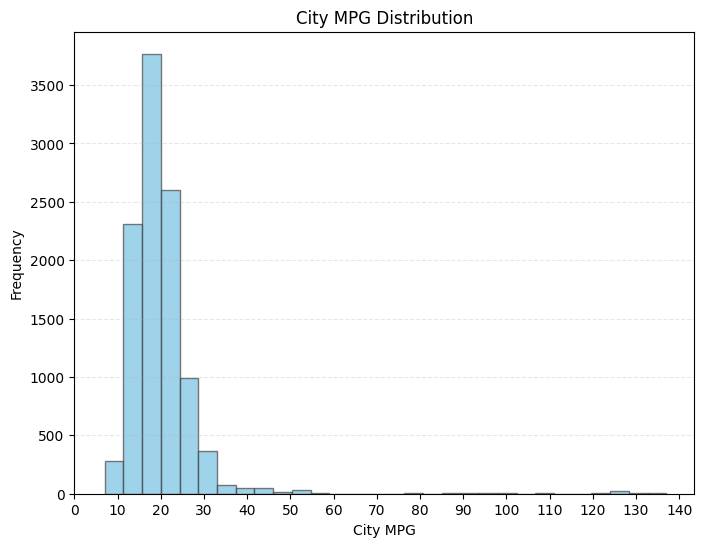

In [ ]:
# Histogram City MPG Distribution

data_column = df['city mpg']
# Creating a new figure with=8 height=6
plt.figure(figsize=(8,6))
plt.hist(data_column, bins=30, alpha=0.7, edgecolor='#444444', color='#76C1E1')

# Setting x-axis ticks every 10 units for better readability
plt.xticks(range(0, int(df['city mpg'].max())+5, 10))

# Setting labels and title
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.title('City MPG Distribution')
plt.grid(axis='y', linestyle = '--', alpha= 0.3)

# Showing the chart
plt.show()

**Note**: The distribution of City MPG is strongly **right-skewed**, indicating that most vehicles fall within the low to mid range fuel efficiency.
The majority of cars achieve roughly 11 to 25 MPG, with a noticeable peak around 15-20 MPG, reflecting the market concentration of standard cars.

Very few vehicles reach extremely high city MPG values, which correspond to electric or highly efficient hybrid cars, and these appear as outliers in the dataset.

This pattern suggests that the dataset reflects the real-world market, where most cars have moderate fuel efficiency, and high efficiency vehicles are relatively rare.

#####**6.3.2  Bar chart: Average MSRP by Vehicle Size**

In [ ]:
# Checking how many categories there are to set the list of colors
df['Vehicle Size'].nunique() # Only 3 categories

3

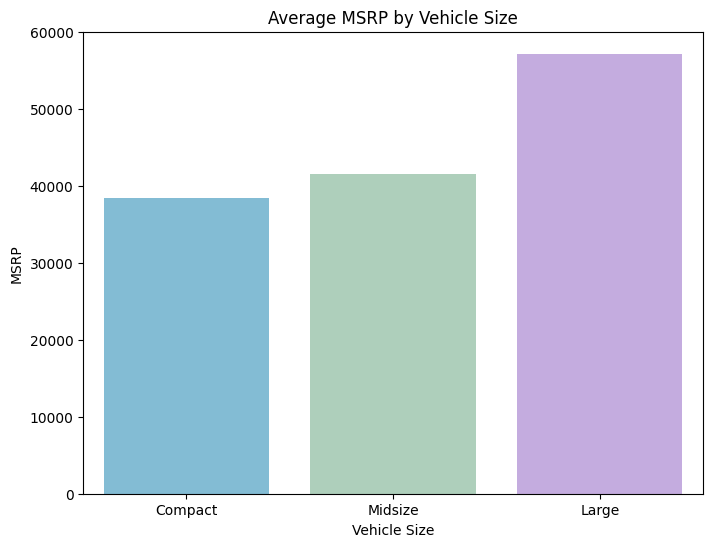

In [ ]:
# Bar Chart Average MSRP by Vehicle Size

# Creating a new figure with=8 height=6
plt.figure(figsize=(8,6))

# Creating a list of 3 colors
palette = ["#76C1E1", "#A8D5BA", "#C4A3E8"]

# Creating the bar plot using seaborn
sns.barplot(
    data=df,
    x='Vehicle Size',   # x-axis categorical variable Vehicle Size
    y='MSRP',           # y-axis numerical variable MSRP
    hue='Vehicle Size', # because the palette is deprecated, I set the hue = Veicle Size
    palette=palette,    # passing the list of 3 colors
    errorbar=None       # hide the error bar (ci)
)

# Setting labels and title
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')
plt.title('Average MSRP by Vehicle Size')

# Showing the chart
plt.show()

**Note**: The bar plot shows a clear difference in market price between large vehicles and the other two vehicle sizes. Large vehicles are much more expensive on average, while Compact and Midsize vehicles have similar average prices.

#####**6.3.3 Scatter plot: Engine HP vs. MSRP**

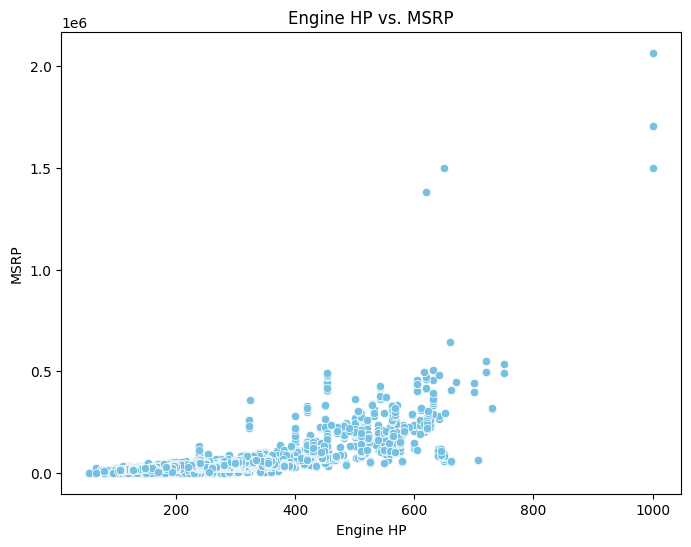

In [ ]:
# Scatter plot Engine HP vs. MSRP
# Creating a new figure with=8 height=6
plt.figure(figsize=(8,6))

# Creating the scatterplot using seaborn
sns.scatterplot(
    data=df,
    x='Engine HP',     # x-axis Engine HP
    y='MSRP',          # y-axis MSRP
    color = '#76C1E1'  # color
)
# Setting labels and title
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs. MSRP')

# Showing the scatter plot
plt.show()

**Note**: The scatter plot shows a clear positive relationship between engine horsepower and market price.

- Cars with more horsepower tend to have higher MSRPs, confirming that power is an important driver of price.

- Most vehicles fall within the 100-400 HP range and stay in the lower price region (below 100000).

- As horsepower increases, price variability becomes much larger, and a few high-performance models emerge as clear outliers with exceptionally high MSRPs.

The plot also shows clear performance levels.
Below 300 HP, prices follow a fairly predictable trend, while above 500 HP vehicles enter the premium or exotic segments, where pricing behaves differently and is probably influenced by brand, exclusivity, and luxury positioning rather than engine power alone.

#####**6.3.4 Boxplot: MSRP by Driven_Wheels**

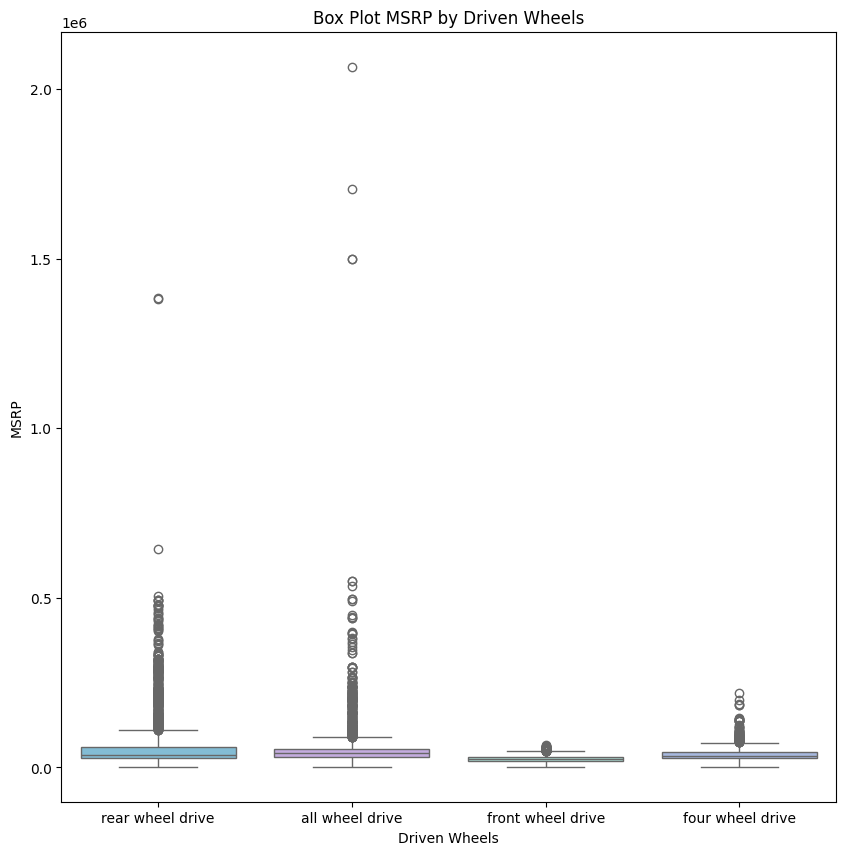

In [ ]:
# Initializing the plot
plt.figure(figsize=(10, 10))

# Creating a custom palette for each driventrains
palette = ["#76C1E1", "#C4A3E8", "#A7E7DB", "#9EB6E8"]

# Creating the box plot using seaborn
sns.boxplot(
    data=df,
    x='Driven_Wheels',     # Categorical variable on the x-axis
    y='MSRP',              # Numerical variable on the y-axis to show the distribution
    hue='Driven_Wheels',   # using hue to avoid deprecated warning on palette
    palette=palette        # Color palette for better visual distinction
)

# Adding Plot Titles and Labels
plt.title('Box Plot MSRP by Driven Wheels')  # Descriptive title for the box plot
plt.xlabel('Driven Wheels')                  # Label for the x-axis
plt.ylabel('MSRP')                           # Label for the y-axis



# Displaying the Plot
plt.show()  # Renders the plot in the output


**Note**: I first visualize the MSRP distribution across Driven Wheels using all available data.
However, the presence of extremely high-priced vehicles (some models exceed one million) compresses the main portion of the boxplots, making the quartiles and medians difficult to interpret.

To improve clarity, I generate a second boxplot by applying an upper limit on the Y-axis.

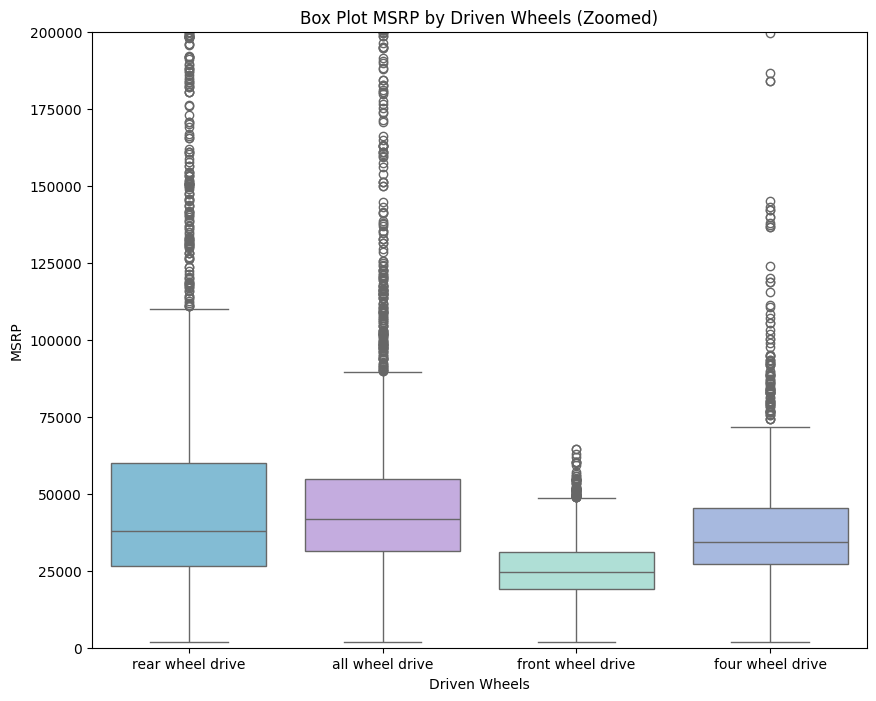

In [ ]:
# Zooming the box plot for better readability
plt.figure(figsize=(10, 8))
palette = ["#76C1E1", "#C4A3E8", "#A7E7DB", "#9EB6E8"]
sns.boxplot(
    data=df,
    x='Driven_Wheels',
    y='MSRP',
    hue='Driven_Wheels',
    palette=palette
)
# Limiting the visualization of the y axis to 200000
plt.ylim(0, 200000)
plt.title('Box Plot MSRP by Driven Wheels (Zoomed)')
plt.xlabel('Driven Wheels')
plt.ylabel('MSRP')
plt.show()

**Note**: This view highlights the typical price range, making the box, whiskers, and median much easier to read while still preserving the underlying distribution shape.

- Rear-wheel and all-wheel drive cars tend to be more expensive, reflecting their presence in powerful or premium models.

- Front-wheel drive vehicles are generally more affordable, typical of everyday cars.

- Four-wheel drive vehicles show a wide price range, with some high-end models as outliers.

Overall, drivetrain type clearly relates to market price, with luxury and performance vehicles standing out.

#####**6.3.5 Line plot city mpg and highway MPG by Transmission Type**

                     city mpg  highway MPG
Transmission Type                         
AUTOMATED_MANUAL    20.408680    28.296564
AUTOMATIC           18.979016    25.819430
DIRECT_DRIVE       110.794118    97.970588
MANUAL              19.884154    27.266755


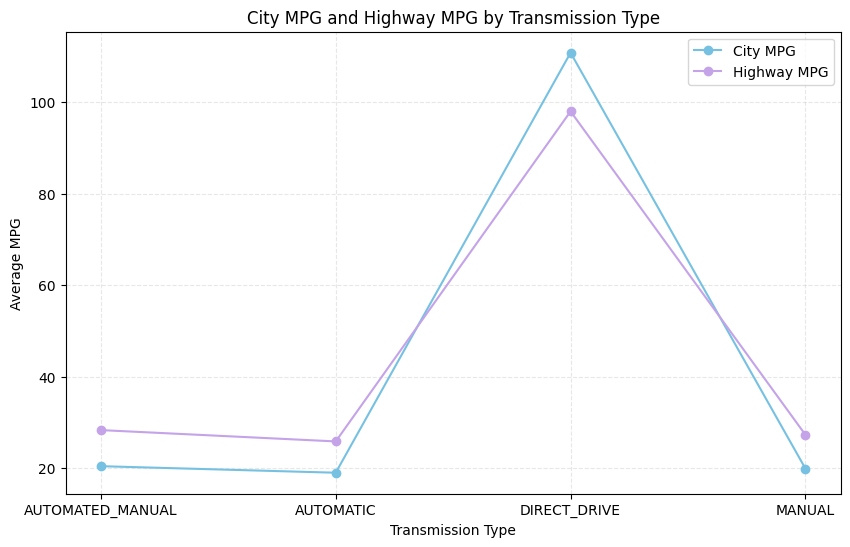

In [ ]:
# Line plot City MPG and Highway MPG by Transmission Type

# Computing the average of city mpg and higway MPG and group these value by Transmission Type
# Since I canceled 9 rows with UNKNOWN Transmission Type value, I have only 4 Transmission Type
# Creating the dataframe with groupby
mpg_grouped = df.groupby('Transmission Type')[['city mpg', 'highway MPG']].mean()
print(mpg_grouped)

# Creating the line plot
plt.figure(figsize=(10,6))

# One plot for city mpg
plt.plot(mpg_grouped.index, mpg_grouped['city mpg'], marker='o', label='City MPG', color='#76C1E1')
# One plot for highway mpg
plt.plot(mpg_grouped.index, mpg_grouped['highway MPG'], marker='o', label='Highway MPG', color='#C4A3E8')

# Setting labels and title
plt.title("City MPG and Highway MPG by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Average MPG")

# Setting grid values
plt.grid(visible= True, linestyle='--', alpha=0.3)

# Including also the legend
plt.legend()

# Showing the line plot
plt.show()



**Note**: The line plot shows that Automatic, Manual, and Automated Manual transmissions have very similar fuel-efficiency levels, with City MPG around 19-20 and Highway MPG around 26-29.

In contrast, **Direct Drive** displays much higher values because it corresponds to electric vehicles, which naturally achieve far greater MPG-equivalent ratings.

Interestingly, electric vehicles show better efficiency in city driving than on the highway, the opposite of conventional cars.

Overall, the plot highlights a tight cluster for traditional transmissions and a clear outlier formed by electric vehicles.

#####**6.3.6 Additional Visualization Insights**



To complement the descriptive statistics, I produced a set of distribution focused visualizations to better understand how numerical features behave and how extreme values affect the dataset.

**- Bar Chart: Total MPG per Vehicle Size**


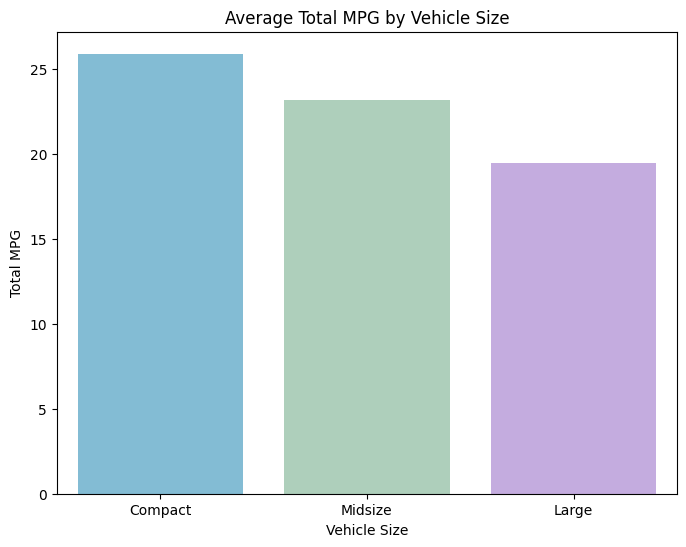

In [ ]:
# Total MPG per Vehicle Size

# Creating a new figure with=8 height=6
plt.figure(figsize=(8,6))

# Creating a list of 3 colors
palette = ["#76C1E1", "#A8D5BA", "#C4A3E8"]

# Creating the bar plot using seaborn
sns.barplot(
    data=df,
    x='Vehicle Size',   # x-axis categorical variable Vehicle Size
    y='Total MPG',           # y-axis numerical variable Total MPG
    hue='Vehicle Size', # because the palette is deprecated, I set the hue = Veicle Size
    palette=palette,    # passing the list of 3 colors
    errorbar=None,       # hide the error bar (ci)
)

# Setting labels and title
plt.xlabel('Vehicle Size')
plt.ylabel('Total MPG')
plt.title('Average Total MPG by Vehicle Size')

# Showing the chart
plt.show()

**Note**: A simple pattern appears: compact cars are the most efficient, midsize cars sit in the middle, and large vehicles consume the most.
A clean confirmation of how size affects fuel economy.

**- Scatter plot: Total MPG vs. MSRP**

This scatter plot compares Total MPG (average of city and highway MPG) with MSRP, and highlights Engine Fuel Types through color.

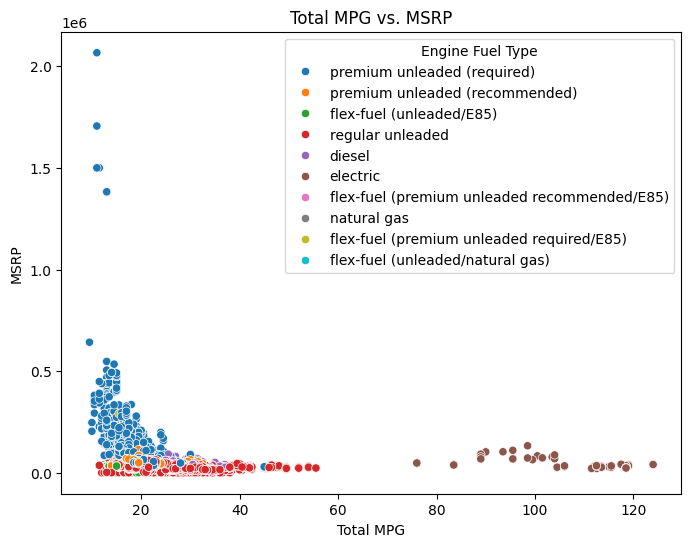

In [ ]:
# Scatter plot Total MPG vs. MSRP
# Creating a new figure with=8 height=6
plt.figure(figsize=(8,6))

# Creating the scatterplot using seaborn
sns.scatterplot(
    data=df,
    x='Total MPG',     # x-axis Engine HP
    y='MSRP',          # y-axis MSRP
    color = '#76C1E1',  # color
    hue = 'Engine Fuel Type'
)
# Setting labels and title
plt.xlabel('Total MPG')
plt.ylabel('MSRP')
plt.title('Total MPG vs. MSRP')

# Showing the scatter plot
plt.show()

**Note**: A clear pattern emerges:

Vehicles using premium unleaded (required) show the widest price spread, from lower-cost models to very high-end ones, while their efficiency remains consistently low and tightly grouped.

Cars running on regular unleaded display a wider range of Total MPG, covering many efficiency levels while staying within a more moderate price band.

Most other fuel types cluster in the lower-efficiency, mid-price area, without strong variation on either axis.

**Electric vehicles** stand apart completely: they occupy a distinct zone of high efficiency and relatively consistent pricing, separating them clearly from all categories.

Overall, premium models diversify mainly in price, regular unleaded models diversify mainly in efficiency, while electric vehicles form an entirely separate high efficiency group.

An **extreme outlier** appeared in the Total MPG vs. Price plot.
After correcting the underlying data entry (as documented in the cleaning section), the plot aligned with the expected patterns.

**- Scatter plot: Engine HP vs. MSRP by Make (Highlighting Premium and Luxury Vehicles)**

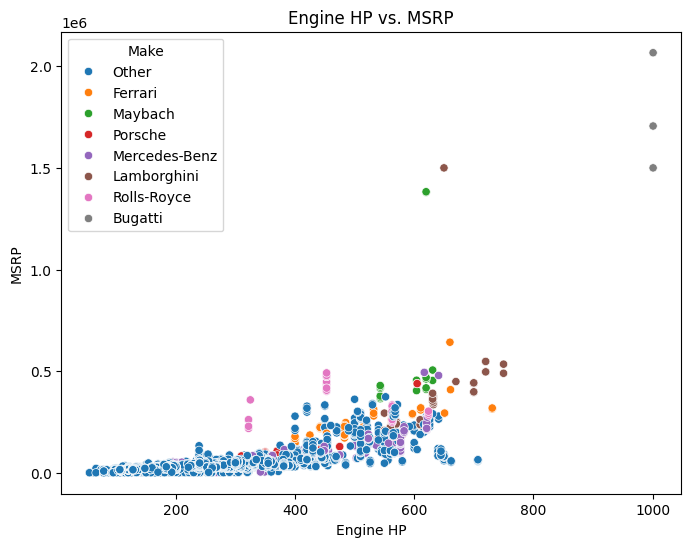

In [ ]:
# Scatter plot Engine HP vs. MSRP by Make highlighting Premium and Luxury vehicles
# Creating a new figure with=8 height=6
plt.figure(figsize=(8,6))

# Highlithing the makes with high price
luxury_cars = df[df['MSRP'] > 400000] # vehicles priced above $400,000
# A list of luxury cars to highlith in the chart with different colors
top_cars = luxury_cars['Make'].unique()

# Creating the scatterplot using seaborn
sns.scatterplot(
    data=df,
    x='Engine HP',     # x-axis Engine HP
    y='MSRP',          # y-axis MSRP
    # only luxury cars have different colors
    hue=df['Make'].apply(lambda x: x if x in top_cars else 'Other')

)
# Setting labels and title
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs. MSRP')

# Showing the scatter plot
plt.show()

**Note**: This chart is a multivariate deep-dive into the price distribution, extending the earlier bivariate analysis of MSRP.
The primary relationship shown is between Engine HP and MSRP, but the use of color introduces a third dimension by highlighting luxury makes (vehicles priced above $400,000).

The plot confirms the general pattern: higher horsepower tends to correspond to higher prices.
Luxury brands, however, expand this relationship vertically, showing much higher price variability for similar horsepower levels. This creates a wider vertical spread in the plot, indicating that brand positioning and exclusivity contribute significantly to MSRP beyond engine performance alone.

**- Box plot: MSRP Distribution for Top 10 Makes**

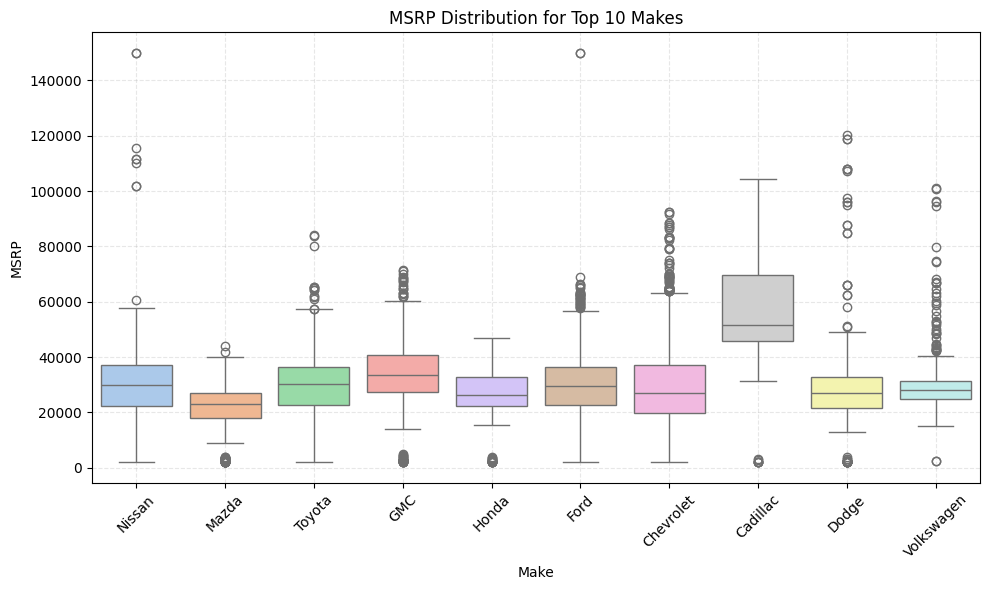

In [ ]:
# Retrieving the 10 top Makes per total records (frequency)
top_makes = df['Make'].value_counts().head(10).index
# Filtering the dataset by these Makes
df_top = df[df['Make'].isin(top_makes)]

# creating the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Make', y='MSRP', data=df_top, palette='pastel', hue= 'Make')
plt.xticks(rotation=45)
plt.title('MSRP Distribution for Top 10 Makes')
plt.xlabel('Make')
plt.ylabel('MSRP')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Note**: The boxplot shows that most top-selling manufacturers have similar price ranges, with overlapping medians and distributions. Cadillac is the clear exception, showing much higher typical prices and a wider spread, reflecting its luxury positioning.
Most brands exhibit numerous high-end outliers, reflecting the presence of premium trims or specialty models.

####**6.4 Correlation Analysis**

I compute the Pearson correlations between the main numerical variables: Engine HP, MSRP, Popularity, city mpg, and highway MPG.

This helps identify linear relationships and provides a clearer understanding of how performance, efficiency, and price interact within the dataset.

In [ ]:
# computing the Pearson correlation between Engine HP, MSRP, Popularity, city mpg, and highway MPG variables.
corr_matrix = df[['Engine HP','MSRP','Popularity','city mpg','highway MPG']].corr(method = 'pearson')
corr_matrix

,Engine HP,MSRP,Popularity,city mpg,highway MPG
Engine HP,1.000000,0.653264,0.033261,-0.370039,-0.407676
MSRP,0.653264,1.000000,-0.058046,-0.172721,-0.193274
Popularity,0.033261,-0.058046,1.000000,-0.002136,-0.024078
city mpg,-0.370039,-0.172721,-0.002136,1.000000,0.943547
highway MPG,-0.407676,-0.193274,-0.024078,0.943547,1.000000


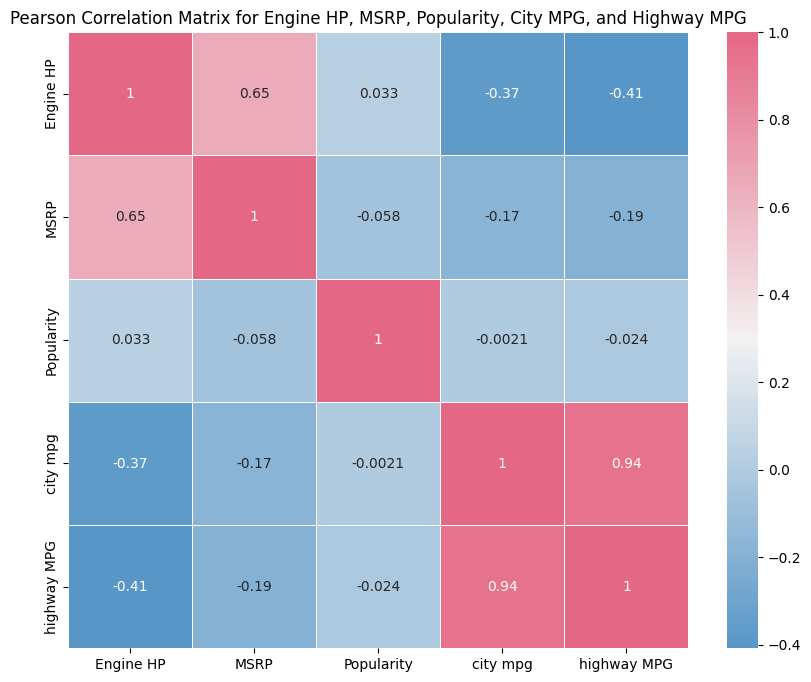

In [ ]:
# Displaying the correlations in a heatmap
# Creating a new figure
plt.figure(figsize =(10,8))

# Creating a diverging map with the same colors I used previousely
cmap = sns.diverging_palette(240, 0, s=70, l=60, as_cmap=True)

sns.heatmap(
    corr_matrix,
    annot = True,     # display correlation coefficients inside the heatmap cells
    cmap =cmap,       # set the color palette with the colors in the variable cmap
    linewidths = 0.5   # Add lines between the cells with 0.5 thickness
)

# Adding a title
plt.title('Pearson Correlation Matrix for Engine HP, MSRP, Popularity, City MPG, and Highway MPG')

# Displaying the heatmap
plt.show()


##### **6.4.1 Correlation Analysis Insights**
1. **Engine HP vs MSRP (correlation: 0.65 moderately positive)**:  
  More powerful engines are associated with higher market prices, as expected for premium or performance vehicles.


2. **Engine HP vs Fuel Efficiency (City and Highway MPG)**:

- city mpg: -0.37
- highway MPG: -0.41
  
  A moderate weak negative relationship: vehicles with higher horsepower tend to be less fuel-efficient in both driving conditions.


3. **MSRP vs Fuel Efficiency (City and Highway MPG)**:

- City MPG: -0.17
- Highway MPG: -0.19

  Slight negative correlations indicate that more expensive vehicles are generally a bit less efficient, probably reflecting larger engines or luxury/performance models.


4. **City vs Highway MPG (correlation: 0.94 - very strong positive)**:  

      Cars that perform well in city driving tend to also perform well on the highway.

5. **Popularity**:

- Popularity shows no correlations with all other features (between -0.06 and 0.03).
This suggests that popularity in this dataset is largely unrelated to price, engine power, or fuel efficiency.


**Overal Interpretation**

Vehicles with more powerful engines tend to cost more, and both higher power and higher price are associated with lower fuel efficiency (MPG). City and highway MPG move together very closely, meaning cars that perform well in one tend to perform well in the other. Popularity, instead, shows no meaningful linear relationship with these technical or pricing features.

###**7 Final Summary**



**Insights derived from  the analysis**

  - From the overall analysis of the dataset, including descriptive statistics, distribution plots, group comparisons, and correlation analysis, we can see some clear patterns in the dataset. Engine power (Engine HP) and vehicle price (MSRP) increase together: more powerful cars usually cost more, and a small number of high-performance models stand out as extreme outliers. City and highway MPG have right-skewed distributions and include electric vehicles that reach unusually high efficiency values. Both MPG measures are moderately negatively related to engine power, meaning stronger engines tend to be less fuel-efficient. Popularity, on the other hand, shows very weak relationships with these technical features, which matches what we see in the visualizations: it does not follow the same patterns as performance, efficiency, or price.

**Patterns/trends identified from visualizations**
- Patterns from the visualizations highlight clear market segments. Rear-wheel drive and all-wheel drive vehicles appear mostly in the higher-price segment, while front-wheel drive cars are concentrated in the lower-price range. Vehicle size influences both price and popularity, with larger cars generally costing more and attracting slightly more attention. Electric cars stand out as efficiency outliers, achieving far higher city MPG values. Fuel type further shapes the market: premium cars diversify mainly in price, regular cars diversify in efficiency, and electric vehicles form a distinct high-efficiency group. Overall, the dataset reveals structured segments, typical trends, and a few extreme outliers, mostly corresponding to luxury or exotic cars.

###**8 Saving the cleaned dataset**

In [ ]:
# Saving the cleaned dataset without mantaining the old index
df.to_csv('/content/drive/MyDrive/Masterschool/CarDataAnalysisProject/cleaned_data.csv', index=False)